# Business Problem: Sales Pipeline Conversion at a SaaS Startup
 


This assignment is around a case study about TechnoServe, a fictional tech SaaS (Software as a service) startup that specialises in different types of cloud-based software services to the small and medium enterprise customers. The products provided by the company are inclined towards increasing the productivity for the customers.

The revenue that the company generates is highly dependent on the consumption of the cloud services that they provide. Therefore, the revenue in-flow in the company is highly dependent on the number of clients that the company has. The company is facing a very pertinent problem faced in the IT industry today, declining conversions across its sales funnel.

 

The problem that the company is facing is that its pipeline conversion percentage has dropped from 35% at the end of the last fiscal (FY 2019-20) to 25% at present. The company needs a solution to solve the issue, and they have asked you to come up with one.

 
    Here are a few details about TechnoServe that you should be aware of:

The company is based out of Pune and started its operations in 2010.
It has clients spread over Pune and other cities as well.
There are more than 600 employees, distributed over multiple teams.
It has a wide variety of IT solutions spread across different industries.
To get a brief idea about IT solutions,

## Problem Statement

Understand the problem, come up with possible hypotheses for low conversions faced by TechnoServe. Once that is done, you need to analyse the dataset given below to validate the hypotheses and form the solution strategy that they should employ to solve the problem. 
The dataset and the data dictionary are given below

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sales-pipeline-conversion-at-a-saas-startup/Sales Dataset.xlsx


In [3]:
df = pd.read_excel(r"/kaggle/input/sales-pipeline-conversion-at-a-saas-startup/Sales Dataset.xlsx")
df.head()

,Opportunity ID,Technology\nPrimary,City,B2B Sales Medium,Sales Velocity,Opportunity Status,Sales Stage Iterations,Opportunity Size (USD),Client Revenue Sizing,Client Employee Sizing,Business from Client Last Year,Compete Intel,Opportunity Sizing
0,N00000001,ERP Implementation,Bengaluru,Marketing,76,Won,13,0,More than 1M,More than 25K,0 (No business),Unknown,10K or less
1,N00000002,ERP Implementation,Delhi,Enterprise Sellers,63,Loss,2,0,250K to 500K,More than 25K,0 (No business),Unknown,10K or less
2,N00000003,Technical Business Solutions,Delhi,Enterprise Sellers,24,Won,7,7750,100K or less,1K or less,0 (No business),Unknown,10K or less
3,N00000004,Technical Business Solutions,Mumbai,Enterprise Sellers,16,Loss,5,0,100K or less,1K or less,0 (No business),Known,10K or less
4,N00000005,ERP Implementation,Delhi,Enterprise Sellers,69,Loss,11,32886,100K or less,1K or less,0 (No business),Unknown,30K to 40K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78025 entries, 0 to 78024
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Opportunity ID                  78025 non-null  object
 1   Technology
Primary              78025 non-null  object
 2   City                            78025 non-null  object
 3   B2B Sales Medium                78025 non-null  object
 4   Sales Velocity                  78025 non-null  int64 
 5   Opportunity Status              78025 non-null  object
 6   Sales Stage Iterations          78025 non-null  int64 
 7   Opportunity Size (USD)          78025 non-null  int64 
 8   Client Revenue Sizing           78025 non-null  object
 9   Client Employee Sizing          78025 non-null  object
 10  Business from Client Last Year  78025 non-null  object
 11  Compete Intel                   78025 non-null  object
 12  Opportunity Sizing              78025 non-null

In [5]:
df.shape

(78025, 13)

In [6]:
df.describe()

,Sales Velocity,Sales Stage Iterations,Opportunity Size (USD)
count,78025.000000,78025.000000,78025.000000
mean,43.595348,2.955732,30085.664992
std,26.585600,1.497242,21169.932617
min,0.000000,1.000000,0.000000
25%,19.000000,2.000000,13816.000000
50%,43.000000,3.000000,29845.000000
75%,65.000000,3.000000,43185.000000
max,210.000000,23.000000,149981.000000


# Duplicate Check

In [7]:
df_dub = df.copy()

# Checking for duplicates and dropping the entire duplicate row if any
df_dub.drop_duplicates(subset=None, inplace=True)
df_dub.shape

(78025, 13)

In [8]:
df.shape

(78025, 13)

The shape after running the drop duplicate command is same as the original dataframe.

Hence we can conclude that there were zero duplicate values in the dataset.

# Data Preparation

Converting some binary variables (Won/Lost) to 1/0

In [9]:
# List of variables to map

varlist =  ['Opportunity Status']

# Defining the map function
def binary_map(x):
    return x.map({'Won': 1, "Loss": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)
df.head()

,Opportunity ID,Technology\nPrimary,City,B2B Sales Medium,Sales Velocity,Opportunity Status,Sales Stage Iterations,Opportunity Size (USD),Client Revenue Sizing,Client Employee Sizing,Business from Client Last Year,Compete Intel,Opportunity Sizing
0,N00000001,ERP Implementation,Bengaluru,Marketing,76,1,13,0,More than 1M,More than 25K,0 (No business),Unknown,10K or less
1,N00000002,ERP Implementation,Delhi,Enterprise Sellers,63,0,2,0,250K to 500K,More than 25K,0 (No business),Unknown,10K or less
2,N00000003,Technical Business Solutions,Delhi,Enterprise Sellers,24,1,7,7750,100K or less,1K or less,0 (No business),Unknown,10K or less
3,N00000004,Technical Business Solutions,Mumbai,Enterprise Sellers,16,0,5,0,100K or less,1K or less,0 (No business),Known,10K or less
4,N00000005,ERP Implementation,Delhi,Enterprise Sellers,69,0,11,32886,100K or less,1K or less,0 (No business),Unknown,30K to 40K


#Dproping 'Opportunity ID' field as it will not help to take decision 

In [10]:
df= df.drop(['Opportunity ID'],1)
df.head()

,Technology\nPrimary,City,B2B Sales Medium,Sales Velocity,Opportunity Status,Sales Stage Iterations,Opportunity Size (USD),Client Revenue Sizing,Client Employee Sizing,Business from Client Last Year,Compete Intel,Opportunity Sizing
0,ERP Implementation,Bengaluru,Marketing,76,1,13,0,More than 1M,More than 25K,0 (No business),Unknown,10K or less
1,ERP Implementation,Delhi,Enterprise Sellers,63,0,2,0,250K to 500K,More than 25K,0 (No business),Unknown,10K or less
2,Technical Business Solutions,Delhi,Enterprise Sellers,24,1,7,7750,100K or less,1K or less,0 (No business),Unknown,10K or less
3,Technical Business Solutions,Mumbai,Enterprise Sellers,16,0,5,0,100K or less,1K or less,0 (No business),Known,10K or less
4,ERP Implementation,Delhi,Enterprise Sellers,69,0,11,32886,100K or less,1K or less,0 (No business),Unknown,30K to 40K


Technology\nPrimary

In [11]:
df['Technology\nPrimary'].describe()

count                  78025
unique                     4
top       ERP Implementation
freq                   49810
Name: Technology\nPrimary, dtype: object

In [12]:
df['Technology\nPrimary'].value_counts()

ERP Implementation              49810
Technical Business Solutions    27325
Legacy Modernization              609
Analytics                         281
Name: Technology\nPrimary, dtype: int64

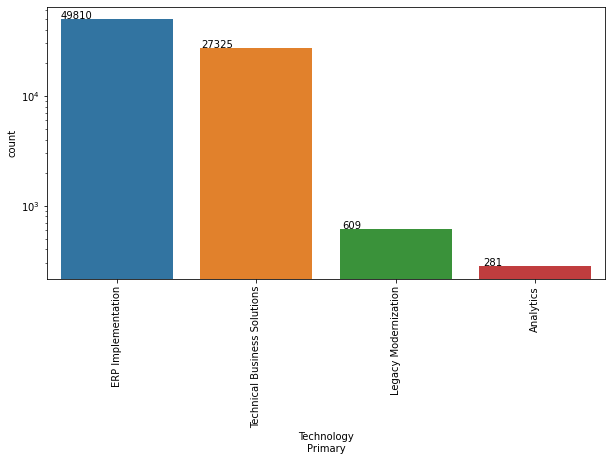

In [13]:
plt.figure(figsize = (10,5))
ax= sns.countplot(df['Technology\nPrimary'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set_yscale('log')
plt.xticks(rotation = 90)
plt.show()

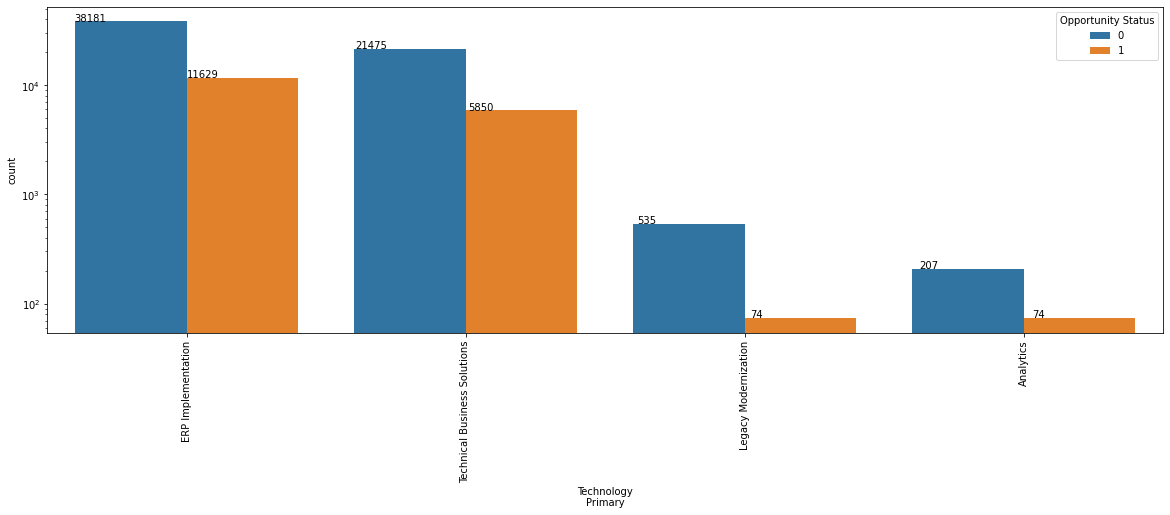

In [14]:
plt.figure(figsize = (20,6))
ax= sns.countplot(x = "Technology\nPrimary", hue = "Opportunity Status", data = df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

City

In [15]:
df['City'].describe()

count      78025
unique         7
top       Mumbai
freq       21020
Name: City, dtype: object

In [16]:
df['City'].value_counts()

Mumbai       21020
Delhi        15142
Bengaluru     9552
Hyderabad     9232
Pune          8153
Chennai       7568
Kolkata       7358
Name: City, dtype: int64

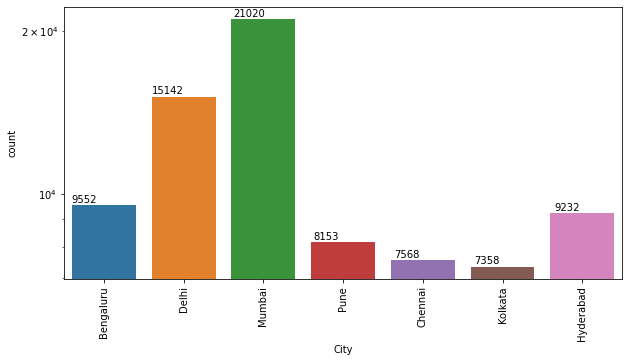

In [17]:
plt.figure(figsize = (10,5))
ax= sns.countplot(df['City'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set_yscale('log')
plt.xticks(rotation = 90)
plt.show()

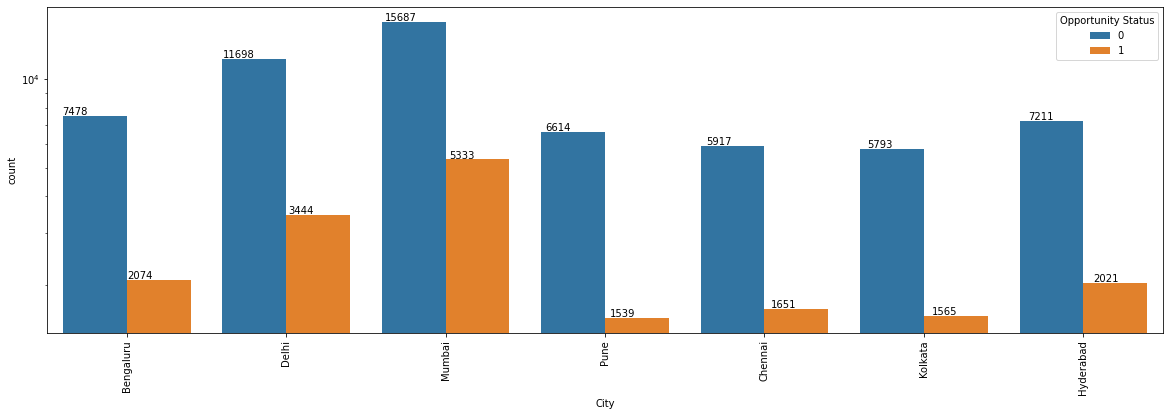

In [18]:
plt.figure(figsize = (20,6))
ax= sns.countplot(x = "City", hue = "Opportunity Status", data = df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

B2B Sales Medium

In [19]:
df['B2B Sales Medium'].describe()

count         78025
unique            5
top       Marketing
freq          37262
Name: B2B Sales Medium, dtype: object

In [20]:
df['B2B Sales Medium'].value_counts()

Marketing             37262
Enterprise Sellers    34758
Partners               2856
Tele Sales             2530
Online Leads            619
Name: B2B Sales Medium, dtype: int64

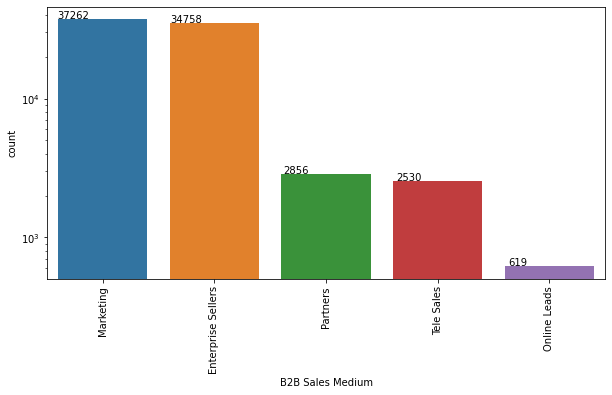

In [21]:
plt.figure(figsize = (10,5))
ax= sns.countplot(df['B2B Sales Medium'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set_yscale('log')
plt.xticks(rotation = 90)
plt.show()

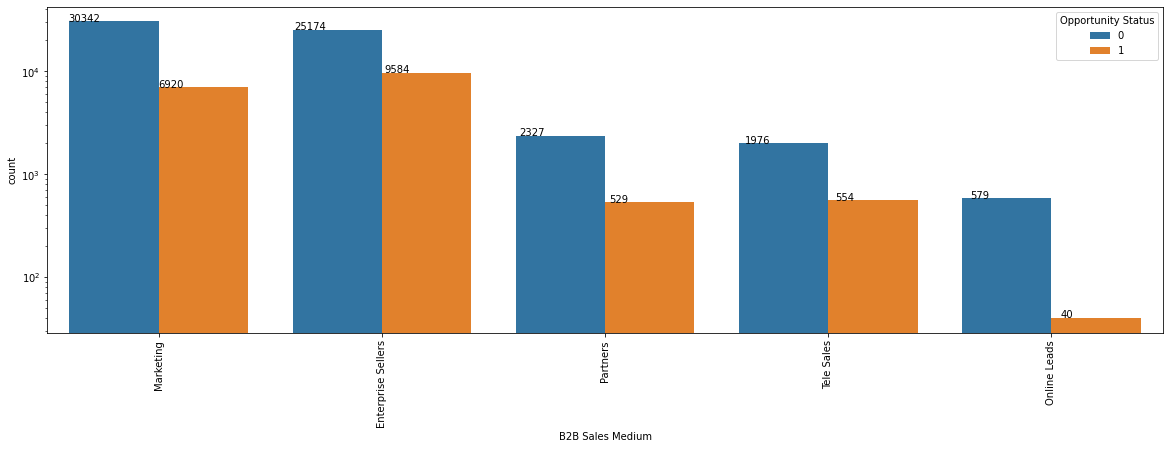

In [22]:
plt.figure(figsize = (20,6))
ax= sns.countplot(x = "B2B Sales Medium", hue = "Opportunity Status", data = df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

Sales Velocity

In [23]:
df['Sales Velocity'].describe()

count    78025.000000
mean        43.595348
std         26.585600
min          0.000000
25%         19.000000
50%         43.000000
75%         65.000000
max        210.000000
Name: Sales Velocity, dtype: float64

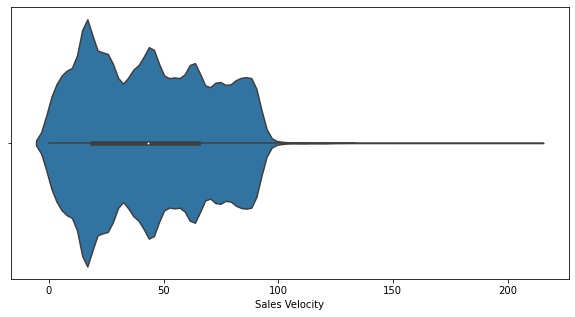

In [24]:
plt.figure(figsize = (10,5))
ax= sns.violinplot(df['Sales Velocity'])
plt.show()

In [25]:
# As we can see there are a number of outliers in the data.
# We will cap the outliers to 95% value for analysis.

In [26]:
percentiles = df['Sales Velocity'].quantile([0.05,0.95]).values
df['Sales Velocity'][df['Sales Velocity'] <= percentiles[0]] = percentiles[0]
df['Sales Velocity'][df['Sales Velocity'] >= percentiles[1]] = percentiles[1]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


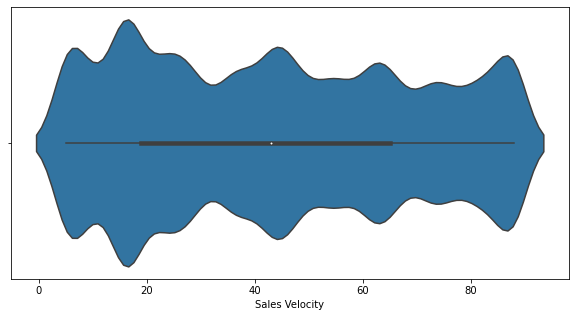

In [27]:
plt.figure(figsize = (10,5))
ax= sns.violinplot(df['Sales Velocity'])
plt.show()

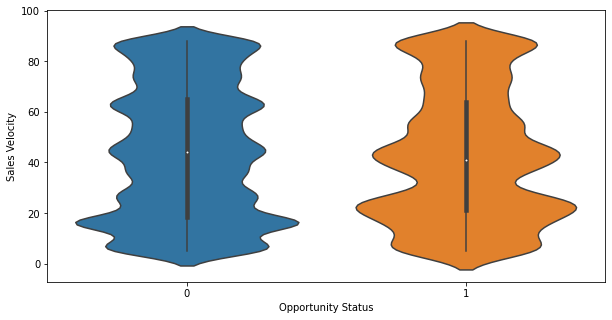

In [28]:
plt.figure(figsize = (10,5))
sns.violinplot(y = 'Sales Velocity', x = 'Opportunity Status', data = df)
plt.show()

Opportunity Status

In [29]:
df['Opportunity Status'].describe()

count    78025.000000
mean         0.225915
std          0.418186
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Opportunity Status, dtype: float64

In [30]:
df['Opportunity Status'].value_counts()

0    60398
1    17627
Name: Opportunity Status, dtype: int64

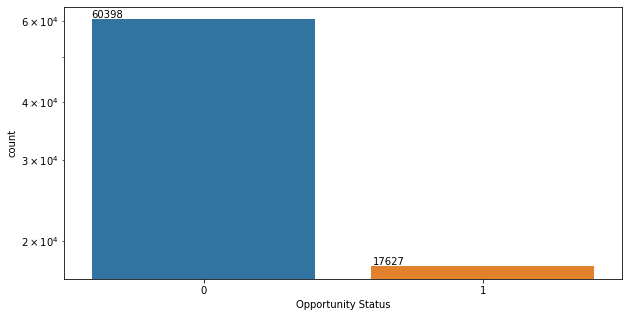

In [31]:
plt.figure(figsize = (10,5))
ax= sns.countplot(df['Opportunity Status'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set_yscale('log')
plt.show()

Sales Stage Iterations	

In [32]:
df['Sales Stage Iterations'].describe()

count    78025.000000
mean         2.955732
std          1.497242
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         23.000000
Name: Sales Stage Iterations, dtype: float64

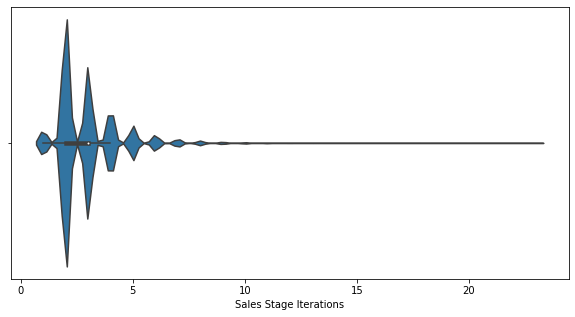

In [33]:
plt.figure(figsize = (10,5))
ax= sns.violinplot(df['Sales Stage Iterations'])
plt.show()

In [34]:
percentiles = df['Sales Stage Iterations'].quantile([0.05,0.95]).values
df['Sales Stage Iterations'][df['Sales Stage Iterations'] <= percentiles[0]] = percentiles[0]
df['Sales Stage Iterations'][df['Sales Stage Iterations'] >= percentiles[1]] = percentiles[1]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


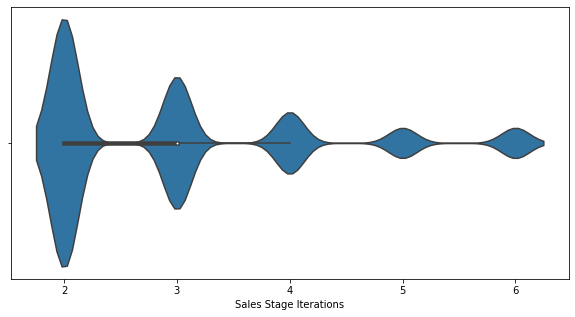

In [35]:
plt.figure(figsize = (10,5))
ax= sns.violinplot(df['Sales Stage Iterations'])
plt.show()

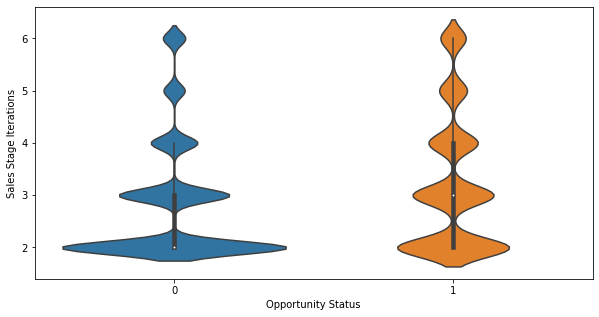

In [36]:
plt.figure(figsize = (10,5))
sns.violinplot(y = 'Sales Stage Iterations', x = 'Opportunity Status', data = df)
plt.show()

Opportunity Size (USD)

In [37]:
df['Opportunity Size (USD)'].describe()

count     78025.000000
mean      30085.664992
std       21169.932617
min           0.000000
25%       13816.000000
50%       29845.000000
75%       43185.000000
max      149981.000000
Name: Opportunity Size (USD), dtype: float64

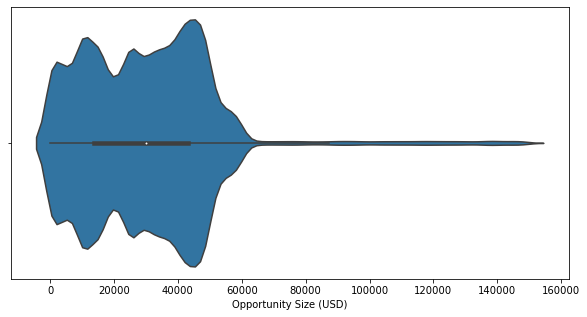

In [38]:
plt.figure(figsize = (10,5))
ax= sns.violinplot(df['Opportunity Size (USD)'])
plt.show()

In [39]:
percentiles = df['Opportunity Size (USD)'].quantile([0.05,0.95]).values
df['Opportunity Size (USD)'][df['Opportunity Size (USD)'] <= percentiles[0]] = percentiles[0]
df['Opportunity Size (USD)'][df['Opportunity Size (USD)'] >= percentiles[1]] = percentiles[1]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


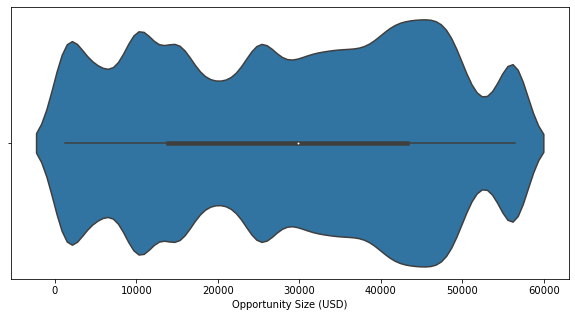

In [40]:
plt.figure(figsize = (10,5))
ax= sns.violinplot(df['Opportunity Size (USD)'])
plt.show()

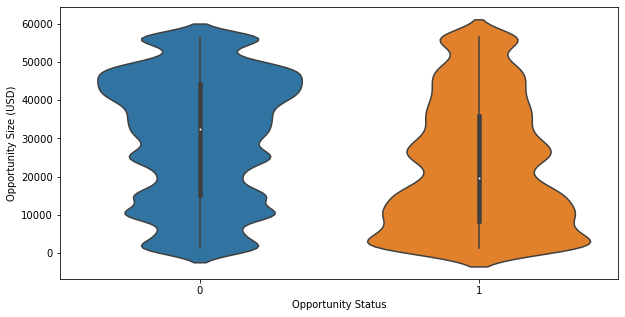

In [41]:
plt.figure(figsize = (10,5))
sns.violinplot(y = 'Opportunity Size (USD)', x = 'Opportunity Status', data = df)
plt.show()

Client Revenue Sizing

In [42]:
df['Client Revenue Sizing'].describe()

count            78025
unique               5
top       100K or less
freq             59504
Name: Client Revenue Sizing, dtype: object

In [43]:
df['Client Revenue Sizing'].value_counts()

100K or less    59504
More than 1M     5288
250K to 500K     4756
500K to 1M       4636
100K to 250K     3841
Name: Client Revenue Sizing, dtype: int64

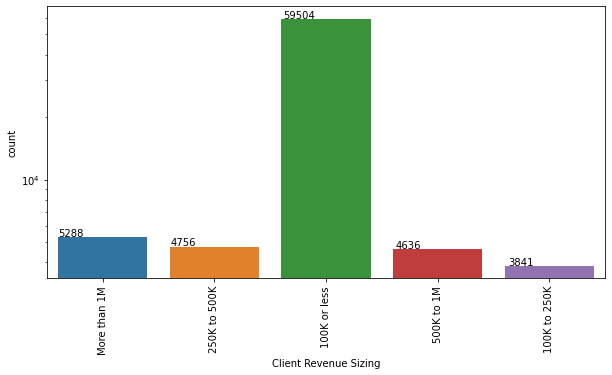

In [44]:
plt.figure(figsize = (10,5))
ax= sns.countplot(df['Client Revenue Sizing'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set_yscale('log')
plt.xticks(rotation = 90)
plt.show()

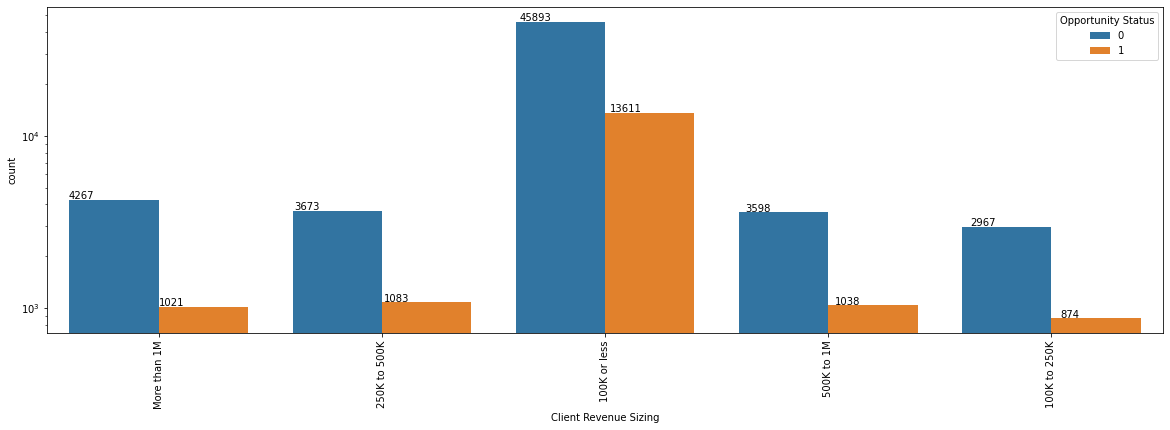

In [45]:
plt.figure(figsize = (20,6))
ax= sns.countplot(x = "Client Revenue Sizing", hue = "Opportunity Status", data = df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

Client Employee Sizing

In [46]:
df['Client Employee Sizing'].describe()

count          78025
unique             5
top       1K or less
freq           59348
Name: Client Employee Sizing, dtype: object

In [47]:
df['Client Employee Sizing'].value_counts()

1K or less       59348
More than 25K     5098
5K to 15K         4942
1K to 5K          4528
15K to 25K        4109
Name: Client Employee Sizing, dtype: int64

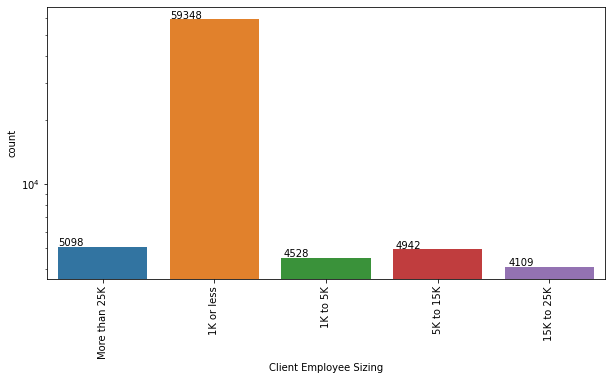

In [48]:
plt.figure(figsize = (10,5))
ax= sns.countplot(df['Client Employee Sizing'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set_yscale('log')
plt.xticks(rotation = 90)
plt.show()

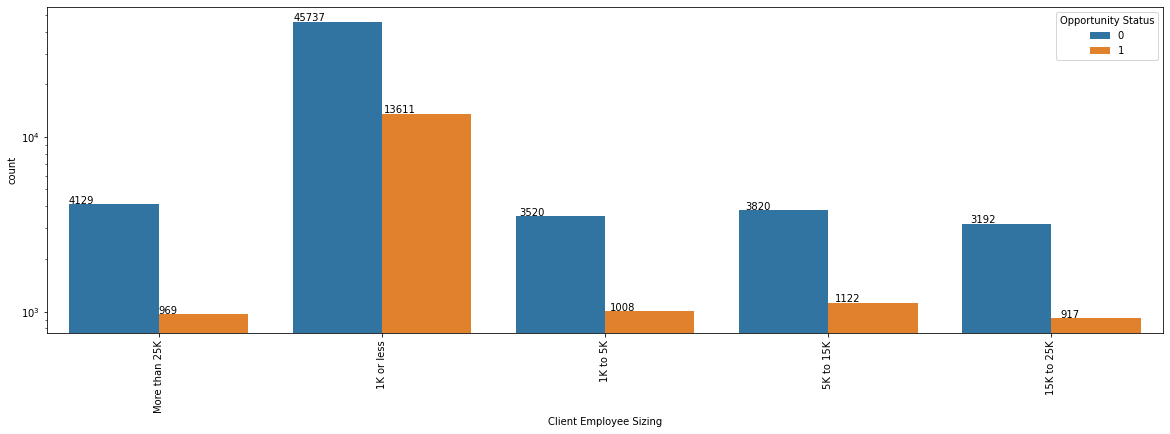

In [49]:
plt.figure(figsize = (20,6))
ax= sns.countplot(x = "Client Employee Sizing", hue = "Opportunity Status", data = df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

Business from Client Last Year

In [50]:
df['Business from Client Last Year'].describe()

count               78025
unique                  5
top       0 (No business)
freq                69208
Name: Business from Client Last Year, dtype: object

In [51]:
df['Business from Client Last Year'].value_counts()

0 (No business)      69208
More than 100,000     2860
50,000 - 100,000      2092
25,000 - 50,000       2083
0 - 25,000            1782
Name: Business from Client Last Year, dtype: int64

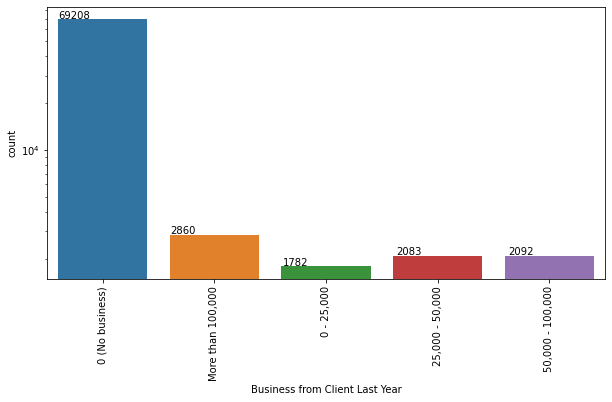

In [52]:
plt.figure(figsize = (10,5))
ax= sns.countplot(df['Business from Client Last Year'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set_yscale('log')
plt.xticks(rotation = 90)
plt.show()

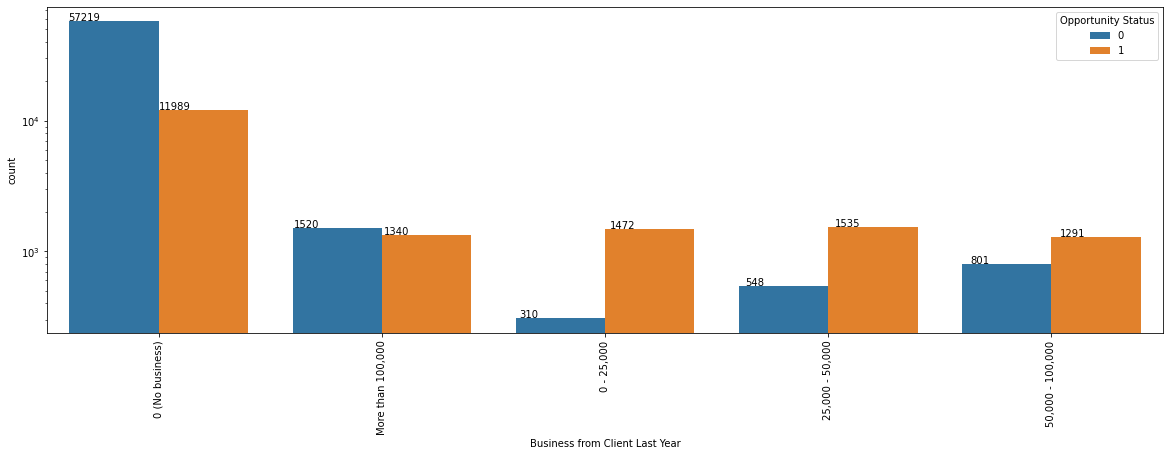

In [53]:
plt.figure(figsize = (20,6))
ax= sns.countplot(x = "Business from Client Last Year", hue = "Opportunity Status", data = df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

Compete Intel

In [54]:
df['Compete Intel'].describe()

count       78025
unique          3
top       Unknown
freq        56724
Name: Compete Intel, dtype: object

In [55]:
df['Compete Intel'].value_counts()

Unknown    56724
Known      12044
None        9257
Name: Compete Intel, dtype: int64

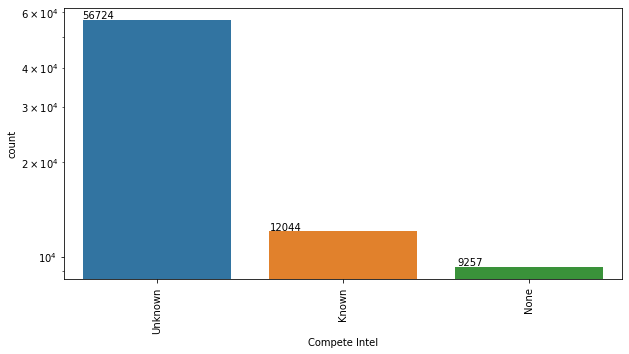

In [56]:
plt.figure(figsize = (10,5))
ax= sns.countplot(df['Compete Intel'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set_yscale('log')
plt.xticks(rotation = 90)
plt.show()

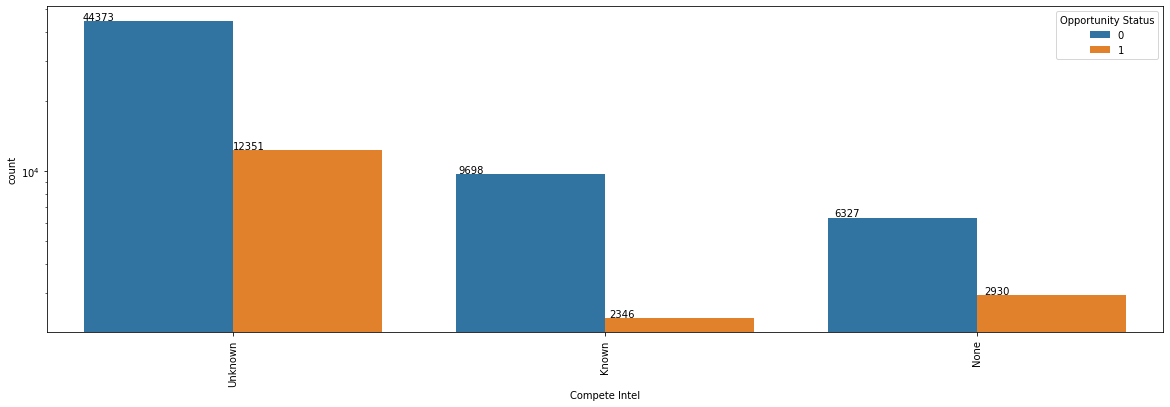

In [57]:
plt.figure(figsize = (20,6))
ax= sns.countplot(x = "Compete Intel", hue = "Opportunity Status", data = df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

Opportunity Sizing

In [58]:
df['Opportunity Sizing'].describe()

count          78025
unique             7
top       40K to 50K
freq           18074
Name: Opportunity Sizing, dtype: object

In [59]:
df['Opportunity Sizing'].value_counts()

40K to 50K       18074
10K to 20K       15123
30K to 40K       13628
10K or less      12095
20K to 30K       11968
50K to 60K        4934
More than 60K     2203
Name: Opportunity Sizing, dtype: int64

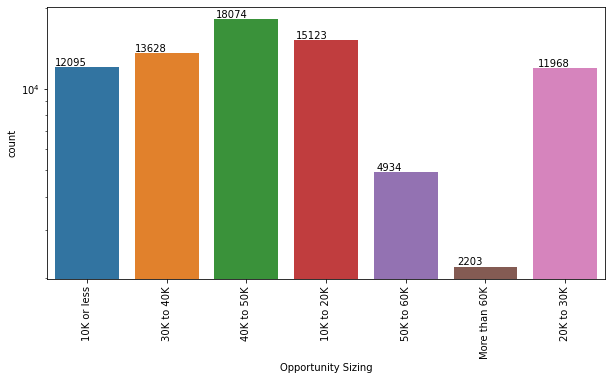

In [60]:
plt.figure(figsize = (10,5))
ax= sns.countplot(df['Opportunity Sizing'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set_yscale('log')
plt.xticks(rotation = 90)
plt.show()

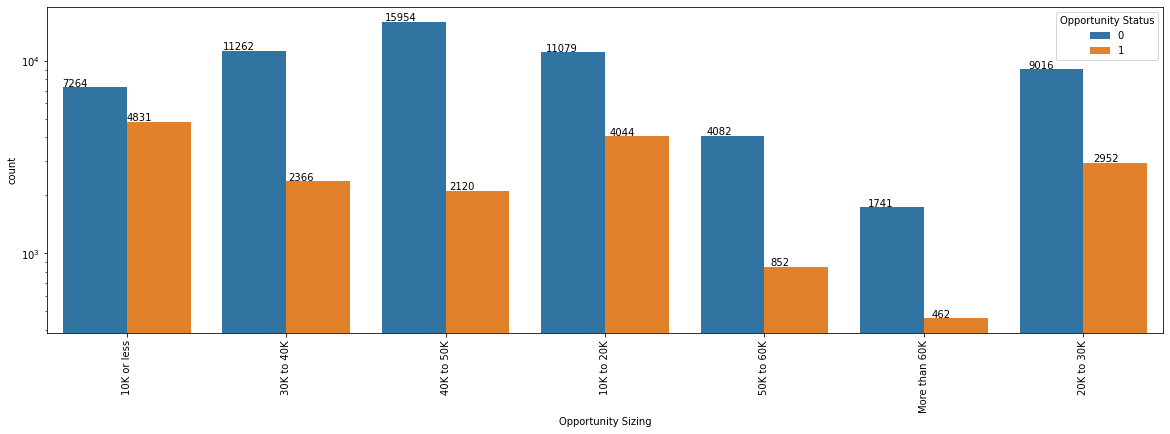

In [61]:
plt.figure(figsize = (20,6))
ax= sns.countplot(x = "Opportunity Sizing", hue = "Opportunity Status", data = df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

In [62]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['Technology\nPrimary', 'City', 'B2B Sales Medium', 'Client Revenue Sizing',
                            'Client Employee Sizing', 'Business from Client Last Year',
                            'Compete Intel', 'Opportunity Sizing']], drop_first=True)
dummy1.head()


,Technology\nPrimary_ERP Implementation,Technology\nPrimary_Legacy Modernization,Technology\nPrimary_Technical Business Solutions,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,City_Pune,B2B Sales Medium_Marketing,...,"Business from Client Last Year_50,000 - 100,000","Business from Client Last Year_More than 100,000",Compete Intel_None,Compete Intel_Unknown,Opportunity Sizing_10K to 20K,Opportunity Sizing_20K to 30K,Opportunity Sizing_30K to 40K,Opportunity Sizing_40K to 50K,Opportunity Sizing_50K to 60K,Opportunity Sizing_More than 60K
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [63]:
# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)
df.head()

,Technology\nPrimary,City,B2B Sales Medium,Sales Velocity,Opportunity Status,Sales Stage Iterations,Opportunity Size (USD),Client Revenue Sizing,Client Employee Sizing,Business from Client Last Year,...,"Business from Client Last Year_50,000 - 100,000","Business from Client Last Year_More than 100,000",Compete Intel_None,Compete Intel_Unknown,Opportunity Sizing_10K to 20K,Opportunity Sizing_20K to 30K,Opportunity Sizing_30K to 40K,Opportunity Sizing_40K to 50K,Opportunity Sizing_50K to 60K,Opportunity Sizing_More than 60K
0,ERP Implementation,Bengaluru,Marketing,76,1,6,1192.8,More than 1M,More than 25K,0 (No business),...,0,0,0,1,0,0,0,0,0,0
1,ERP Implementation,Delhi,Enterprise Sellers,63,0,2,1192.8,250K to 500K,More than 25K,0 (No business),...,0,0,0,1,0,0,0,0,0,0
2,Technical Business Solutions,Delhi,Enterprise Sellers,24,1,6,7750.0,100K or less,1K or less,0 (No business),...,0,0,0,1,0,0,0,0,0,0
3,Technical Business Solutions,Mumbai,Enterprise Sellers,16,0,5,1192.8,100K or less,1K or less,0 (No business),...,0,0,0,0,0,0,0,0,0,0
4,ERP Implementation,Delhi,Enterprise Sellers,69,0,6,32886.0,100K or less,1K or less,0 (No business),...,0,0,0,1,0,0,1,0,0,0


In [64]:
df = df.drop(['Technology\nPrimary', 'City', 'B2B Sales Medium', 'Client Revenue Sizing',
              'Client Employee Sizing', 'Business from Client Last Year',
              'Compete Intel', 'Opportunity Sizing'], axis = 1)
df.head()

,Sales Velocity,Opportunity Status,Sales Stage Iterations,Opportunity Size (USD),Technology\nPrimary_ERP Implementation,Technology\nPrimary_Legacy Modernization,Technology\nPrimary_Technical Business Solutions,City_Chennai,City_Delhi,City_Hyderabad,...,"Business from Client Last Year_50,000 - 100,000","Business from Client Last Year_More than 100,000",Compete Intel_None,Compete Intel_Unknown,Opportunity Sizing_10K to 20K,Opportunity Sizing_20K to 30K,Opportunity Sizing_30K to 40K,Opportunity Sizing_40K to 50K,Opportunity Sizing_50K to 60K,Opportunity Sizing_More than 60K
0,76,1,6,1192.8,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,63,0,2,1192.8,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,24,1,6,7750.0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,16,0,5,1192.8,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,0,6,32886.0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0


In [65]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = df.drop(['Opportunity Status'], axis=1)

In [66]:
X.head()

,Sales Velocity,Sales Stage Iterations,Opportunity Size (USD),Technology\nPrimary_ERP Implementation,Technology\nPrimary_Legacy Modernization,Technology\nPrimary_Technical Business Solutions,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,...,"Business from Client Last Year_50,000 - 100,000","Business from Client Last Year_More than 100,000",Compete Intel_None,Compete Intel_Unknown,Opportunity Sizing_10K to 20K,Opportunity Sizing_20K to 30K,Opportunity Sizing_30K to 40K,Opportunity Sizing_40K to 50K,Opportunity Sizing_50K to 60K,Opportunity Sizing_More than 60K
0,76,6,1192.8,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,63,2,1192.8,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,24,6,7750.0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,16,5,1192.8,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,6,32886.0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0


In [67]:
X.shape

(78025, 36)

In [68]:
# Putting response variable to y
y = df['Opportunity Status']

In [69]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Opportunity Status, dtype: int64

In [70]:
y.shape

(78025,)

In [71]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=125)

In [72]:
X_train.head()

,Sales Velocity,Sales Stage Iterations,Opportunity Size (USD),Technology\nPrimary_ERP Implementation,Technology\nPrimary_Legacy Modernization,Technology\nPrimary_Technical Business Solutions,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,...,"Business from Client Last Year_50,000 - 100,000","Business from Client Last Year_More than 100,000",Compete Intel_None,Compete Intel_Unknown,Opportunity Sizing_10K to 20K,Opportunity Sizing_20K to 30K,Opportunity Sizing_30K to 40K,Opportunity Sizing_40K to 50K,Opportunity Sizing_50K to 60K,Opportunity Sizing_More than 60K
20920,67,2,45671.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
25394,45,2,56309.0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
12555,46,3,31031.0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
40022,7,4,31481.0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
40488,12,2,38951.0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0


In [73]:
X_train.shape

(54617, 36)

In [74]:
X_test.head()

,Sales Velocity,Sales Stage Iterations,Opportunity Size (USD),Technology\nPrimary_ERP Implementation,Technology\nPrimary_Legacy Modernization,Technology\nPrimary_Technical Business Solutions,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,...,"Business from Client Last Year_50,000 - 100,000","Business from Client Last Year_More than 100,000",Compete Intel_None,Compete Intel_Unknown,Opportunity Sizing_10K to 20K,Opportunity Sizing_20K to 30K,Opportunity Sizing_30K to 40K,Opportunity Sizing_40K to 50K,Opportunity Sizing_50K to 60K,Opportunity Sizing_More than 60K
64168,46,3,7917.0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
60072,65,2,10000.0,1,0,0,0,0,1,0,...,1,0,1,0,1,0,0,0,0,0
7959,88,2,37026.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
33330,28,5,56424.8,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
44742,9,2,25046.0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [75]:
X_test.shape

(23408, 36)

In [76]:
y_train.head()

20920    0
25394    0
12555    0
40022    0
40488    0
Name: Opportunity Status, dtype: int64

In [77]:
y_train.shape

(54617,)

In [78]:
y_test.head()

64168    1
60072    1
7959     0
33330    0
44742    0
Name: Opportunity Status, dtype: int64

In [79]:
y_test.shape

(23408,)

# Feature Scaling

In [80]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['Sales Velocity','Sales Stage Iterations',
         'Opportunity Size (USD)']] = scaler.fit_transform(X_train[['Sales Velocity','Sales Stage Iterations',
                                                                    'Opportunity Size (USD)']])

X_train.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,Sales Velocity,Sales Stage Iterations,Opportunity Size (USD),Technology\nPrimary_ERP Implementation,Technology\nPrimary_Legacy Modernization,Technology\nPrimary_Technical Business Solutions,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,...,"Business from Client Last Year_50,000 - 100,000","Business from Client Last Year_More than 100,000",Compete Intel_None,Compete Intel_Unknown,Opportunity Sizing_10K to 20K,Opportunity Sizing_20K to 30K,Opportunity Sizing_30K to 40K,Opportunity Sizing_40K to 50K,Opportunity Sizing_50K to 60K,Opportunity Sizing_More than 60K
20920,0.899865,-0.786970,1.010905,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
25394,0.054926,-0.786970,1.645820,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
12555,0.093333,0.060733,0.137137,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
40022,-1.404513,0.908436,0.163994,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
40488,-1.212481,-0.786970,0.609831,0,0,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0


In [81]:
X_test[['Sales Velocity','Sales Stage Iterations',
         'Opportunity Size (USD)']] = scaler.transform(X_test[['Sales Velocity','Sales Stage Iterations',
                                                               'Opportunity Size (USD)']])

X_test.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,Sales Velocity,Sales Stage Iterations,Opportunity Size (USD),Technology\nPrimary_ERP Implementation,Technology\nPrimary_Legacy Modernization,Technology\nPrimary_Technical Business Solutions,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,...,"Business from Client Last Year_50,000 - 100,000","Business from Client Last Year_More than 100,000",Compete Intel_None,Compete Intel_Unknown,Opportunity Sizing_10K to 20K,Opportunity Sizing_20K to 30K,Opportunity Sizing_30K to 40K,Opportunity Sizing_40K to 50K,Opportunity Sizing_50K to 60K,Opportunity Sizing_More than 60K
64168,0.093333,0.060733,-1.242391,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
60072,0.823052,-0.786970,-1.118070,1,0,0,0,0,1,0,...,1,0,1,0,1,0,0,0,0,0
7959,1.706397,-0.786970,0.494940,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
33330,-0.597981,1.756140,1.652731,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
44742,-1.327700,-0.786970,-0.220070,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [82]:
# Checking the Opportunity Status Rate
Opportunity = round((sum(df['Opportunity Status'])/len(df['Opportunity Status'].index))*100,2)
print("We have almost {} %  Opportunity rate after successful data manipulation".format(Opportunity))

We have almost 22.59 %  Opportunity rate after successful data manipulation


# Model Building

## Decision Tree

It is a type of supervised learning algorithm that is mostly used for classification problems. Surprisingly, it works for both categorical and continuous dependent variables. In this algorithm, we split the population into two or more homogeneous sets. This is done based on most significant attributes/ independent variables to make as distinct groups as possible.

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier()

In [84]:
# fit the model with the training data
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [85]:
# predict the target on the train dataset
predict_train = model.predict(X_train)
predict_train

array([0, 0, 0, ..., 0, 0, 1])

In [86]:
trainaccuracy = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', trainaccuracy)

accuracy_score on train dataset :  0.996777560100335


# VIF

In [87]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Technology\nPrimary_ERP Implementation,54.68
33,Opportunity Sizing_40K to 50K,42.78
5,Technology\nPrimary_Technical Business Solutions,30.72
2,Opportunity Size (USD),29.22
32,Opportunity Sizing_30K to 40K,19.11
34,Opportunity Sizing_50K to 60K,18.11
20,Client Employee Sizing_1K or less,17.36
35,Opportunity Sizing_More than 60K,9.33
31,Opportunity Sizing_20K to 30K,8.86
29,Compete Intel_Unknown,6.40


In [88]:
features_to_remove = vif.loc[vif['VIF'] >= 4.99,'Features'].values
features_to_remove = list(features_to_remove)
print(features_to_remove)

['Technology\nPrimary_ERP Implementation', 'Opportunity Sizing_40K to 50K', 'Technology\nPrimary_Technical Business Solutions', 'Opportunity Size (USD)', 'Opportunity Sizing_30K to 40K', 'Opportunity Sizing_50K to 60K', 'Client Employee Sizing_1K or less', 'Opportunity Sizing_More than 60K', 'Opportunity Sizing_20K to 30K', 'Compete Intel_Unknown']


In [89]:
X_train = X_train.drop(columns=features_to_remove, axis = 1)
X_train.head()

,Sales Velocity,Sales Stage Iterations,Technology\nPrimary_Legacy Modernization,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,City_Pune,B2B Sales Medium_Marketing,...,Client Revenue Sizing_More than 1M,Client Employee Sizing_1K to 5K,Client Employee Sizing_5K to 15K,Client Employee Sizing_More than 25K,"Business from Client Last Year_0 - 25,000","Business from Client Last Year_25,000 - 50,000","Business from Client Last Year_50,000 - 100,000","Business from Client Last Year_More than 100,000",Compete Intel_None,Opportunity Sizing_10K to 20K
20920,0.899865,-0.786970,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25394,0.054926,-0.786970,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
12555,0.093333,0.060733,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
40022,-1.404513,0.908436,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40488,-1.212481,-0.786970,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
X_test = X_test.drop(columns=features_to_remove, axis = 1)
X_test.head()

,Sales Velocity,Sales Stage Iterations,Technology\nPrimary_Legacy Modernization,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,City_Pune,B2B Sales Medium_Marketing,...,Client Revenue Sizing_More than 1M,Client Employee Sizing_1K to 5K,Client Employee Sizing_5K to 15K,Client Employee Sizing_More than 25K,"Business from Client Last Year_0 - 25,000","Business from Client Last Year_25,000 - 50,000","Business from Client Last Year_50,000 - 100,000","Business from Client Last Year_More than 100,000",Compete Intel_None,Opportunity Sizing_10K to 20K
64168,0.093333,0.060733,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
60072,0.823052,-0.786970,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,1
7959,1.706397,-0.786970,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
33330,-0.597981,1.756140,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
44742,-1.327700,-0.786970,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
# fit the model with the training data
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [92]:
# predict the target on the train dataset
predict_train = model.predict(X_train)
predict_train

array([0, 0, 0, ..., 0, 0, 1])

In [93]:
accuracytrain = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', accuracytrain)

accuracy_score on train dataset :  0.923576908288628


# VIF 

In [94]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,B2B Sales Medium_Marketing,2.01
4,City_Delhi,1.52
7,City_Mumbai,1.52
14,Client Revenue Sizing_250K to 500K,1.32
19,Client Employee Sizing_More than 25K,1.30
16,Client Revenue Sizing_More than 1M,1.29
0,Sales Velocity,1.28
18,Client Employee Sizing_5K to 15K,1.28
17,Client Employee Sizing_1K to 5K,1.26
15,Client Revenue Sizing_500K to 1M,1.26


In [95]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train, predict_train )
print(confusion)

[[41639   623]
 [ 3551  8804]]


In [96]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [97]:
# Let's see the sensitivity of our model
trainsensitivity= TP / float(TP+FN)
trainsensitivity

0.7125859975718333

In [98]:
# Let us calculate specificity
trainspecificity= TN / float(TN+FP)
trainspecificity

0.9852586247692963

In [99]:
# Calculate false postive rate - predicting Opportunity when company does not have Opportunity
print(FP/ float(TN+FP))

0.014741375230703705


In [100]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9339132279622361


In [101]:
# Negative predictive value
print(TN / float(TN+ FN))

0.9214206682894446


# Plotting the ROC Curve

In [102]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

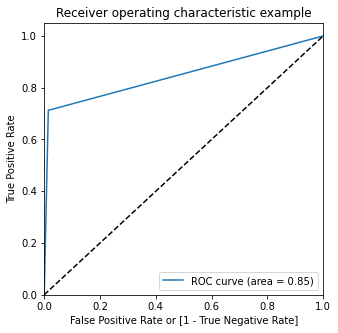

In [103]:
draw_roc(y_train,predict_train)

# Precision and Recall

In [104]:
#Using sklearn utilities for the same

In [105]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train,predict_train)

0.9339132279622361

In [106]:
recall_score(y_train,predict_train)

0.7125859975718333

Making predictions on the test set

In [107]:
# predict the target on the test dataset
predict_test = model.predict(X_test)
print('Target on test data\n\n',predict_test)

Target on test data

 [1 1 0 ... 1 0 0]


In [108]:
confusion2 = metrics.confusion_matrix(y_test, predict_test )
print(confusion2)

[[16332  1804]
 [ 2835  2437]]


In [109]:
# Let's check the overall accuracy.
testaccuracy= accuracy_score(y_test,predict_test)
testaccuracy

0.8018198906356802

In [110]:
# Let's see the sensitivity of our model
testsensitivity=TP / float(TP+FN)
testsensitivity

0.7125859975718333

In [111]:
# Let us calculate specificity
testspecificity= TN / float(TN+FP)
testspecificity

0.9852586247692963

# Final Observation:

In [112]:
# Let us compare the values obtained for Train & Test:
print("Train Data Accuracy    :{} %".format(round((trainaccuracy*100),2)))
print("Train Data Sensitivity :{} %".format(round((trainsensitivity*100),2)))
print("Train Data Specificity :{} %".format(round((trainspecificity*100),2)))
print("Test Data Accuracy     :{} %".format(round((testaccuracy*100),2)))
print("Test Data Sensitivity  :{} %".format(round((testsensitivity*100),2)))
print("Test Data Specificity  :{} %".format(round((testspecificity*100),2)))

Train Data Accuracy    :99.68 %
Train Data Sensitivity :71.26 %
Train Data Specificity :98.53 %
Test Data Accuracy     :80.18 %
Test Data Sensitivity  :71.26 %
Test Data Specificity  :98.53 %
